## 진해여자고등학교 AI 창의 융합 독서 프로젝트 (코딩제작활동)
> 2025년 7월 18-19  
> 📄 강사: **백대성** (젤리코딩 원장) | ✉️ dsbaek898@icloud.com

# 🌎 기후 변화와 작물 추천 시뮬레이션

## 🎯 목표

- 기후 변수(기온, 이산화탄소 농도, 강수량)의 변화 양상을 살펴보고  
- 이를 기반으로 **작물 추천 알고리즘을 직접 구현**해 봅니다.  
- 단순한 이론이 아닌, 현실적 데이터 기반의 **기후-농업 연결 문제를 탐구**합니다.

---

## 1️⃣ 기후 변화 시계열 분석

- **연도별 온도는 오르고**, CO₂ 농도 역시 **뚜렷한 증가 추세**를 보입니다.
- 강수량은 일정한 주기를 가지며 변동하고 있습니다.
- 시각화를 통해 **패턴의 존재를 눈으로 확인**합니다.

---

## 2️⃣ CO₂와 온도 사이의 관계

- 두 변수의 산점도를 그려보면 거의 일직선처럼 보입니다.
- 선형 회귀를 통해 다음을 확인할 수 있습니다:

```
Temperature ≈ Slope * CO2 + Intercept
```

- 이 결과는 **기온 상승에 CO₂가 영향을 미친다**는 것을 직관적으로 보여줍니다.

---

## 3️⃣ 경남 시군 단위 작물 추천 실험

- **창원, 진주, 밀양, 함양, 거제** 등 5개 도시의 연도별 기온·강수량 데이터 생성
- 작물별 선호 조건(T_opt, R_opt)을 설정한 뒤, **거리 기반 점수**를 계산:

```
Score = exp( -((T - T_opt)^2)/2 ) * exp( -((R - R_opt)^2)/5000 )
```

- 선형 회귀 모델 없이, 점수 최대값을 기준으로 **각 도시별 추천 작물**을 선택

---

## 4️⃣ 어떤 시사점이 있나요?

- 데이터와 모델이 결합되면 기후변화가 **단순한 경고**가 아니라  
  **현실적인 농업 계획 수립의 기준**이 될 수 있습니다.
- 변화하는 환경 속에서도 **데이터로 결정하는 힘**이 있음을 배웁니다.

---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 연도: 1980~2024
years = np.arange(1980, 2025)

# 모의 기온 (약간의 상승 추세 + 노이즈)
temperature = 14.0 + 0.02 * (years - 1980) + np.random.normal(0, 0.1, len(years))

# 모의 CO₂ 농도 (상승 추세 + 노이즈)
co2 = 338 + 2.1 * (years - 1980) + np.random.normal(0, 1.5, len(years))

# 모의 강수량 (큰 추세 없이 약간의 주기적 패턴)
precipitation = 1000 + 10 * np.sin((years - 1980) * 0.5) + np.random.normal(0, 20, len(years))

# DataFrame 구성
df = pd.DataFrame({
    'Year': years,
    'Temperature': temperature,
    'CO2': co2,
    'Precipitation': precipitation
})

df.head()


Year  Temperature         CO2  Precipitation
0  1980    14.045274  338.601527     982.738691
1  1981    13.690014  340.758521     967.094345
2  1982    14.090304  344.464053    1010.899088
3  1983    14.132071  345.680466    1005.826336
4  1984    14.164235  344.643633     973.837511

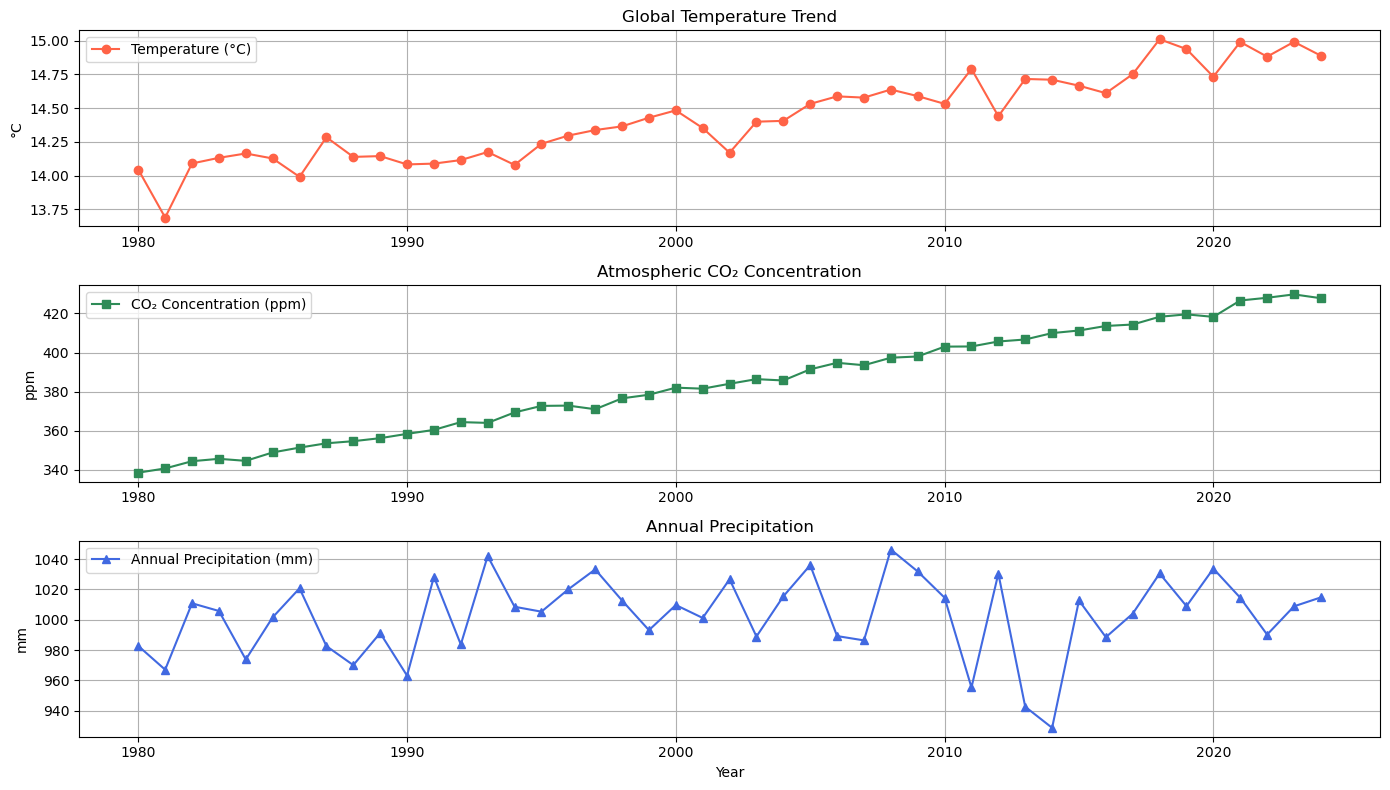

In [2]:
plt.figure(figsize=(14, 8))

# 기온
plt.subplot(3, 1, 1)
plt.plot(df['Year'], df['Temperature'], marker='o', color='tomato', label='Temperature (°C)')
plt.title('Global Temperature Trend')
plt.ylabel('°C')
plt.grid(True)
plt.legend()

# CO2
plt.subplot(3, 1, 2)
plt.plot(df['Year'], df['CO2'], marker='s', color='seagreen', label='CO₂ Concentration (ppm)')
plt.title('Atmospheric CO₂ Concentration')
plt.ylabel('ppm')
plt.grid(True)
plt.legend()

# 강수량
plt.subplot(3, 1, 3)
plt.plot(df['Year'], df['Precipitation'], marker='^', color='royalblue', label='Annual Precipitation (mm)')
plt.title('Annual Precipitation')
plt.xlabel('Year')
plt.ylabel('mm')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


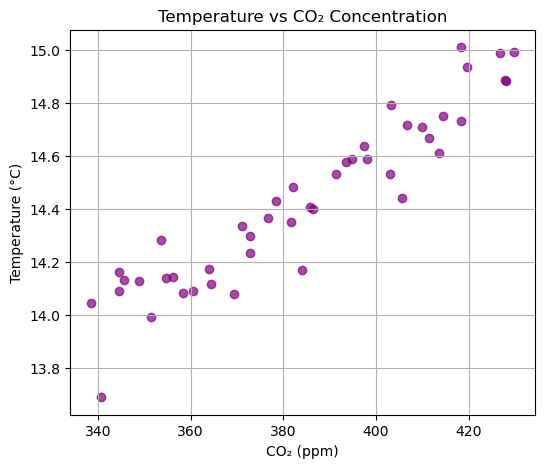

In [3]:
plt.figure(figsize=(6, 5))
plt.scatter(df['CO2'], df['Temperature'], c='purple', alpha=0.7)
plt.title('Temperature vs CO₂ Concentration')
plt.xlabel('CO₂ (ppm)')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


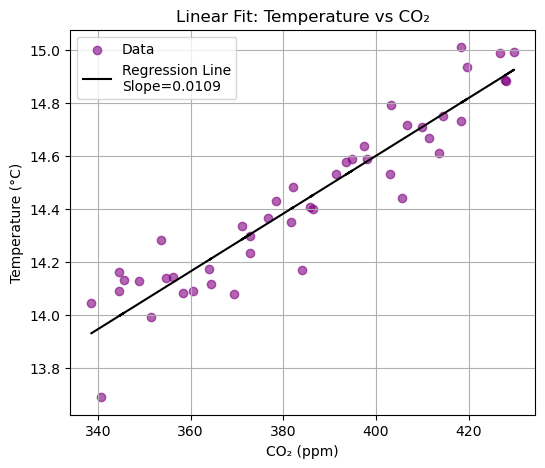

In [4]:
# 회귀선 계산
slope, intercept = np.polyfit(df['CO2'], df['Temperature'], 1)

# 시각화
plt.figure(figsize=(6, 5))
plt.scatter(df['CO2'], df['Temperature'], c='purple', alpha=0.6, label='Data')
plt.plot(df['CO2'], slope * df['CO2'] + intercept, color='black', label=f'Regression Line\nSlope={slope:.4f}')
plt.title('Linear Fit: Temperature vs CO₂')
plt.xlabel('CO₂ (ppm)')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.show()


## 📈 결과 해석

- 연도별 **기온은 꾸준히 상승**하고 있으며,
- 이와 함께 **CO₂ 농도도 꾸준히 증가**하고 있습니다.
- 기온과 CO₂ 간에는 **선형적 양의 상관관계**가 보입니다.
- 이는 **지구 온난화의 원인으로 CO₂ 증가가 중요한 역할**을 함을 보여주는 시뮬레이션 예입니다.


# 🥕 경남 시군단위 작물 추천 시뮬레이션

이 노트북은 경상남도 내 5개 시군에 대해 기온, 강수량 등의 기후 데이터를 기반으로  
작물(밭작물, 과수류)에 적합한 지역을 선형회귀 모델로 예측합니다.

- 기후 조건은 가상 데이터이며,
- 작물별로 '선호 조건'을 정의하여 선호 점수를 계산합니다.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 시군 이름
cities = ['Changwon', 'Jinju', 'Miryang', 'Hamyang', 'Geoje']

# 연도
years = np.arange(2010, 2025)

# 지역별 기온 및 강수량 생성 (도시별 편차 존재)
np.random.seed(42)
data = []
for city in cities:
    temp_base = 13.5 + np.random.rand() * 1.5  # 도시마다 온도 베이스 다름
    rain_base = 1000 + np.random.rand() * 200
    
    for year in years:
        temperature = temp_base + 0.03 * (year - 2010) + np.random.normal(0, 0.1)
        rainfall = rain_base + 5 * np.sin((year - 2010) * 0.4) + np.random.normal(0, 20)
        data.append([city, year, round(temperature, 2), round(rainfall, 2)])

df = pd.DataFrame(data, columns=["City", "Year", "Temperature", "Rainfall"])
df.head()


City  Year  Temperature  Rainfall
0  Changwon  2010        14.13   1220.60
1  Changwon  2011        14.07   1187.41
2  Changwon  2012        14.28   1209.08
3  Changwon  2013        14.10   1205.65
4  Changwon  2014        14.14   1185.83

In [6]:
# 작물 종류와 선호 조건 (기온, 강수량 범위)
crops = {
    'SweetPotato':  {'T_opt': 16,  'R_opt': 1000},
    'Apple':        {'T_opt': 14,  'R_opt': 900},
    'Blueberry':    {'T_opt': 13.5,'R_opt': 1100},
    'Peach':        {'T_opt': 15.5,'R_opt': 950},
    'Garlic':       {'T_opt': 13,  'R_opt': 850}
}


In [7]:
# 작물 선호 점수 계산 함수 (온도와 강수량에서의 거리 기반)
def crop_score(temp, rain, T_opt, R_opt):
    t_score = np.exp(-((temp - T_opt)**2) / 2)
    r_score = np.exp(-((rain - R_opt)**2) / 5000)
    return t_score * r_score

# 작물별 점수 계산
for crop, params in crops.items():
    df[crop] = df.apply(lambda row: crop_score(row['Temperature'], row['Rainfall'], params['T_opt'], params['R_opt']), axis=1)

df.head()


City  Year  Temperature  Rainfall  SweetPotato         Apple  \
0  Changwon  2010        14.13   1220.60     0.000010  1.171100e-09   
1  Changwon  2011        14.07   1187.41     0.000138  6.668061e-08   
2  Changwon  2012        14.28   1209.08     0.000036  4.845142e-09   
3  Changwon  2013        14.10   1205.65     0.000035  7.643697e-09   
4  Changwon  2014        14.14   1185.83     0.000178  7.933727e-08   

   Blueberry         Peach        Garlic  
0   0.044721  1.707062e-07  6.210766e-13  
1   0.184418  4.573867e-06  7.292777e-11  
2   0.068297  7.024516e-07  2.784677e-12  
3   0.089601  7.898802e-07  5.632969e-12  
4   0.186718  5.856504e-06  8.350139e-11

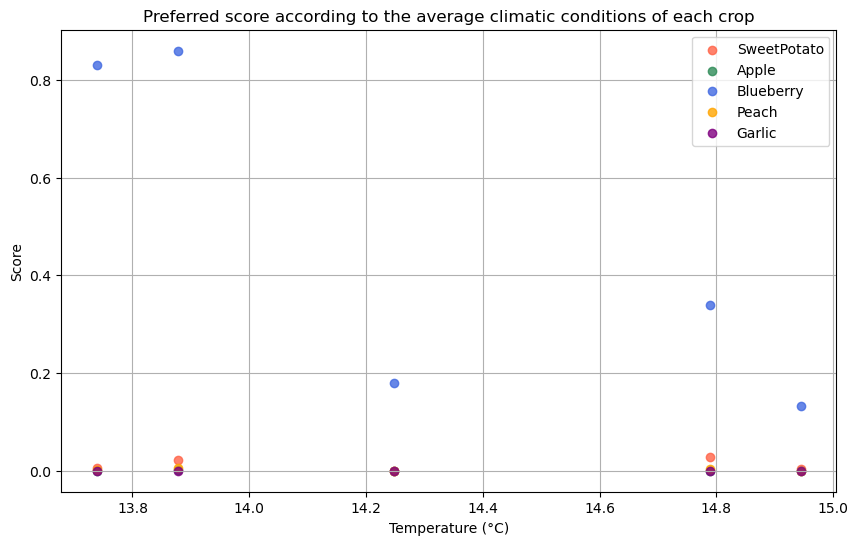

In [8]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 도시별 평균값 및 작물별 예측
grouped = df.groupby('City').mean(numeric_only=True).reset_index()

plt.figure(figsize=(10, 6))

colors = ['tomato', 'seagreen', 'royalblue', 'orange', 'purple']
for i, crop in enumerate(crops.keys()):
    plt.scatter(grouped['Temperature'], grouped[crop], label=crop, alpha=0.8, color=colors[i])

plt.title("Preferred score according to the average climatic conditions of each crop")
plt.xlabel("Temperature (°C)")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# 최신년도 데이터에서 작물 선호도가 가장 높은 작물 추천
latest_year = df['Year'].max()

recommend = df[df['Year'] == latest_year].copy()
recommend['BestCrop'] = recommend[crops.keys()].idxmax(axis=1)
recommend[['City', 'Year', 'Temperature', 'Rainfall', 'BestCrop']]


City  Year  Temperature  Rainfall   BestCrop
14  Changwon  2024        14.42   1224.03  Blueberry
29     Jinju  2024        13.99   1071.95  Blueberry
44   Miryang  2024        14.98   1095.08  Blueberry
59   Hamyang  2024        15.05   1157.66  Blueberry
74     Geoje  2024        13.86   1128.15  Blueberry

---

## 🧠 탐구 질문: 기후와 농업의 연결 고리를 찾아라!

---

### ❓ 1. CO₂는 정말 기온 상승의 원인일까?

데이터를 보면 CO₂가 증가하면서 온도도 증가했어요.  
그런데 **"함께 증가했다"는 사실이 꼭 "원인-결과"를 의미하진 않죠.**

**Q.**  
어떤 추가 정보가 있다면 "CO₂가 기온 상승의 원인이다"라고 더 확신할 수 있을까요?

---

### ❓ 2. 선형 회귀 없이도 가능한 작물 추천?

우리는 작물 추천을 위해 복잡한 회귀모델 없이  
그냥 ‘선호 조건과의 거리’를 계산했어요.

**Q.**  
이 방식이 어떤 점에서 유리할까요?  
또, 어떤 상황에서는 **회귀 모델이 더 적절할 수 있을까요?**

---

### ❓ 3. 기후 변화에 대응하는 농부가 되어보자!

2050년, 기온이 지금보다 1.5도 더 올라가고  
강수량은 지역마다 10%씩 줄어들 전망입니다.

**Q.**  
이런 미래 시나리오에서 작물 추천 알고리즘은 어떻게 달라져야 할까요?  
단지 점수 계산 방식만 바꾸면 될까요? 아니면 더 근본적인 변화가 필요할까요?

---
